In [1]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554) 

Wall time: 16.9 s


In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

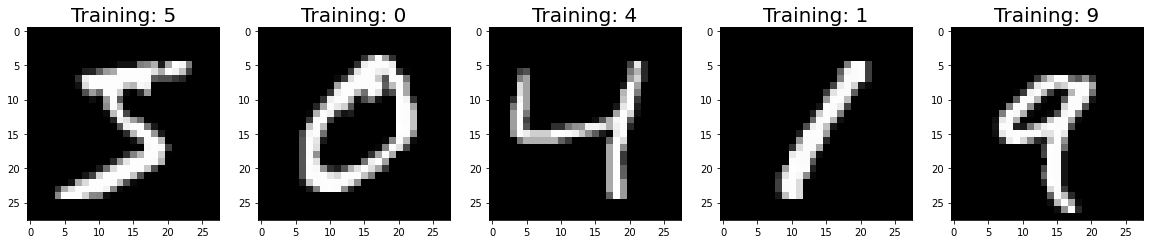

In [4]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], 
                                           mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20);

In [5]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [6]:
X2_train.shape, X2_test.shape

((60000, 784), (10000, 784))

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        tol=0.01
                         )
clf

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=2,
                   warm_start=False)

In [8]:
%%time
clf.fit(X2_train, y2_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 48 epochs took 194 seconds
Wall time: 3min 13s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min finished


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=2,
                   warm_start=False)

In [20]:
print(clf.predict([X2_test[0]]))
print([y2_test[0]])

[0]
[0]


In [11]:
score2 = clf.score(X2_test, y2_test) # test score
score2

0.9192

In [18]:
X2_test[0].shape

(784,)

In [16]:
from PIL import Image
img = Image.open("test_image.jpg")
npimg = np.asarray(img)

In [23]:
npimg.flatten().shape

(784,)

In [24]:
print(clf.predict([npimg.flatten()]))

[5]


In [ ]:
import pickle
pickle.dump(clf,)